In [2]:
"""
A simple-layer autoencoder that compresses 768 pixel MNIST images into 32-pixel vectors  (32- times smaller representation) 
"""

'\nA simple-layer autoencoder that compresses 768 pixel MNIST images into 32-pixel vectors  (32- times smaller representation) \n'

In [17]:
# Import all the packages
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    
### SETTINGS ###

# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("devive:",device)

#Hyperparameters
random_seed = 123
learning_rate = 0.005
num_epochs = 5
batch_size = 256

# Architecture
num_features = 784 # number of input matrix as colum vector 
num_hidden_1 = 32 # fiest hidden layer number of node units

#### MNIST DATASET ###

# Note: tranforms.ToTensor() scale the input images to 0-1 {Normalize the data}

train_set = datasets.MNIST(root='data',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

test_set = datasets.MNIST(root='data',
                          train=False,
                          transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_set,
                         batch_size=batch_size,
                         shuffle=True)

test_loader = DataLoader(dataset=test_set,
                        batch_size=batch_size,
                        shuffle=False)

# checking the dataset
for images, labels, in train_loader:
    print('Image batch dimension',images.shape)
    print('Image label dimension', labels.shape)

devive: cpu
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch

Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])

Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])
Image batch dimension torch.Size([256, 1, 28, 28])
Image label dimension torch.Size([256])

In [20]:
### MODEL ###
class Autoencoder(torch.nn.Module):
    def __init__(self, num_features):
        super(Autoencoder, self).__init__()
        
        ### ENCODER ###
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()
        
        ## DECODER ##
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_features)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()
        
    def forward(self, x):
        ## ENCODER ##
        encoded = self.linear_1(x)
        encoded = F.leaky_relu(encoded)
        
        ## DECODER ##
        logits = self.linear_2(encoded)
        decoded = torch.sigmoid(logits)
        
        return decoded
        
torch.manual_seed(random_seed)
model = Autoencoder(num_features=num_features)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        

In [29]:
## TRAINING ##
start_time = time.time()
for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        # only the images needed
        features = features.view(-1, 28*28).to(device)
        
        ### FORWARD AND BACK PROP ###
        decoded = model(features)
        cost = F.binary_cross_entropy(decoded, features)
        optimizer.zero_grad()
        
        cost.backward()
        
        # UPDATES THE MODEL PARAMETERA
        optimizer.step()
        
        ### LOGGING ###
        if not batch_idx % 50 :
            print('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                 %(epoch+1, num_epochs, batch_idx, 
                   len(train_loader), cost))
            
    print('Time elapsed: %.2f min ' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min ' % ((time.time() - start_time)/60))

Epoch: 001/005 | Batch 000/235 | Cost: 0.0970
Epoch: 001/005 | Batch 050/235 | Cost: 0.0925
Epoch: 001/005 | Batch 100/235 | Cost: 0.0947
Epoch: 001/005 | Batch 150/235 | Cost: 0.0946
Epoch: 001/005 | Batch 200/235 | Cost: 0.0950
Time elapsed: 0.22 min 
Epoch: 002/005 | Batch 000/235 | Cost: 0.0911
Epoch: 002/005 | Batch 050/235 | Cost: 0.0914
Epoch: 002/005 | Batch 100/235 | Cost: 0.0952
Epoch: 002/005 | Batch 150/235 | Cost: 0.0959
Epoch: 002/005 | Batch 200/235 | Cost: 0.0954
Time elapsed: 0.45 min 
Epoch: 003/005 | Batch 000/235 | Cost: 0.0951
Epoch: 003/005 | Batch 050/235 | Cost: 0.0941
Epoch: 003/005 | Batch 100/235 | Cost: 0.0963
Epoch: 003/005 | Batch 150/235 | Cost: 0.0939
Epoch: 003/005 | Batch 200/235 | Cost: 0.0936
Time elapsed: 0.72 min 
Epoch: 004/005 | Batch 000/235 | Cost: 0.0933
Epoch: 004/005 | Batch 050/235 | Cost: 0.0948
Epoch: 004/005 | Batch 100/235 | Cost: 0.0931
Epoch: 004/005 | Batch 150/235 | Cost: 0.0965
Epoch: 004/005 | Batch 200/235 | Cost: 0.0923
Time ela

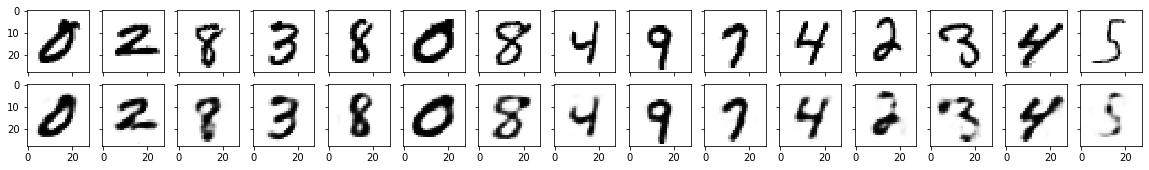

In [36]:
## Model Evaluation ##
%matplotlib inline
import matplotlib.pyplot as plt

#### Visualization ####
n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images,
                       sharex=True, sharey=True, figsize=(20,2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)),cmap='binary')